## Clasificación sobre el dataset hayes-roth
Alberto Armijo Ruiz

### Información sobre el dataset
El dataset *hayes-roth* se trata de un dataset artificial utilizado para estudiar el comportamiento de clasificadores , el atributo *Hobby* está generado de forma aleatoria y se utiliza para introducir ruido dentro del dataset.  Este dataset cuenta con cuatro variables predictoras: *Hobby*, *Age*, *EducationalLevel* y *MaritalStatus*; también contamos con una variable, llamada *Class* que representa la clase en la que se encuentra cada dato.

Cada una de las variables predictoras se encuentran con valores enteros del 1 al 4, menos la variable *Hobby* que va del 1 al 3. La variable que tenemos que predecir cuenta con tres clases (1,2 y 3).

Este dataset cuenta con 160 instancias y no cuenta con datos pérdidos. Se puede encontrar información sobre este dataset en [https://sci2s.ugr.es/keel/dataset.php?cod=186](https://sci2s.ugr.es/keel/dataset.php?cod=186) .

## Análisis exploratorio de los datos
Para leer los datos, deberemos que leer el archivo llamado *hayes-roth.dat* que se encuentra dentro de la carpeta *hayes-roth*. Tras esto, deberemos añadirle los nombres a las variables.

In [3]:
# Leemos el dataset
hayesroth = read.csv('hayes-roth//hayes-roth.dat', comment.char = '@', header = FALSE)
nombres = c('Hobby', 'Age', 'EducationalLevel', 'MaritalStatus','Class')
colnames(hayesroth) = nombres

head(hayesroth)
str(hayesroth)

Hobby,Age,EducationalLevel,MaritalStatus,Class
2,1,1,2,1
2,1,3,2,2
3,1,4,1,3
2,4,2,2,3
1,1,3,4,3
1,1,3,2,2


'data.frame':	160 obs. of  5 variables:
 $ Hobby           : int  2 2 3 2 1 1 3 3 2 1 ...
 $ Age             : int  1 1 1 4 1 1 1 4 2 2 ...
 $ EducationalLevel: int  1 3 4 2 3 3 3 2 1 1 ...
 $ MaritalStatus   : int  2 2 1 2 4 2 2 4 1 1 ...
 $ Class           : int  1 2 3 3 3 2 2 3 1 1 ...


### Cálculo de medias y desviaciones

Ahora calcularemos la media y desviación estandar de cada uno de los atributos.

In [4]:
# Calculamos la media y la desviación.
medias = sapply(hayesroth, mean)
desviaciones = sapply(hayesroth, sd)

# Creamos una tabla y mostramos los resultados.
medydesv = cbind(medias, desviaciones)
medydesv

,medias,desviaciones
Hobby,1.8250,0.8359080
Age,1.9750,0.9380161
EducationalLevel,1.9750,0.9380161
MaritalStatus,1.9750,0.9380161
Class,1.7875,0.7472171


Por lo que podemos ver, las medias y desviaciones tiene bastante sentido, por lo que parece que los datos están bien distribuido, de todas formas, pintaremos las distribuciones de las variables.

### Representación de los datos

In [5]:
# cargamos la librería.
library(ggplot2)

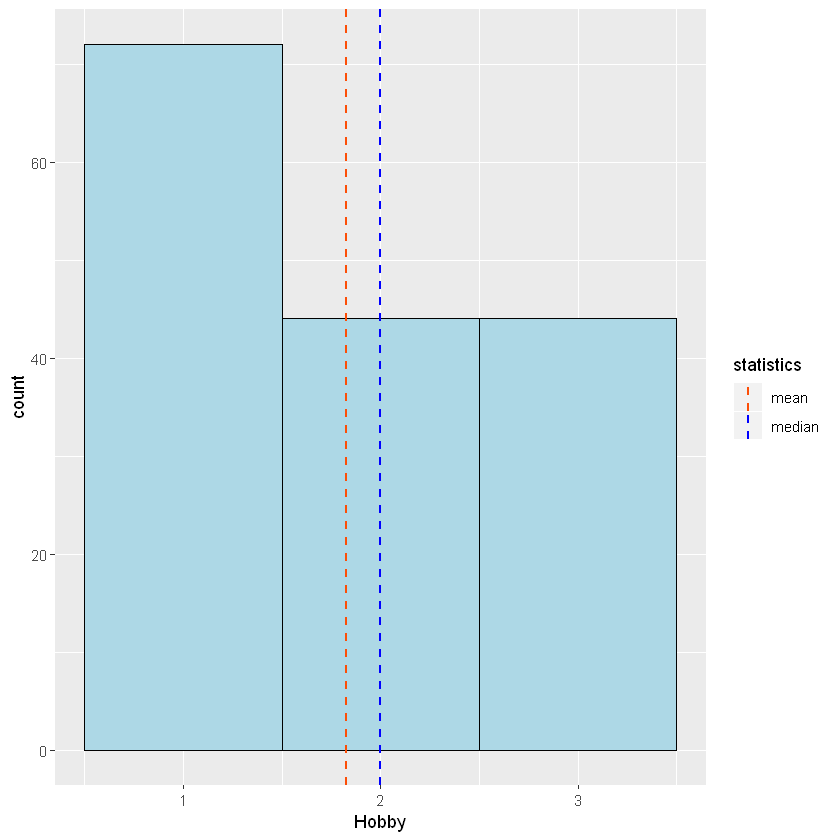

In [6]:
# Pintamos un histograma por cada variable. Dibujaremos la media y la mediana también.
ggplot(hayesroth, aes(x=Hobby))+
    geom_histogram(bins = length(unique(hayesroth$Hobby)), fill="lightblue", 
                   color="black")+
    geom_vline(aes(xintercept = mean(Hobby),color = "mean"), 
             linetype = "dashed", size = 0.6) +
    geom_vline(aes(xintercept = median(Hobby),color="median"),
                  linetype = "dashed", size = 0.6 ) +
    scale_color_manual(name = "statistics", values = c(mean = "#FC4E07", median = "blue"))

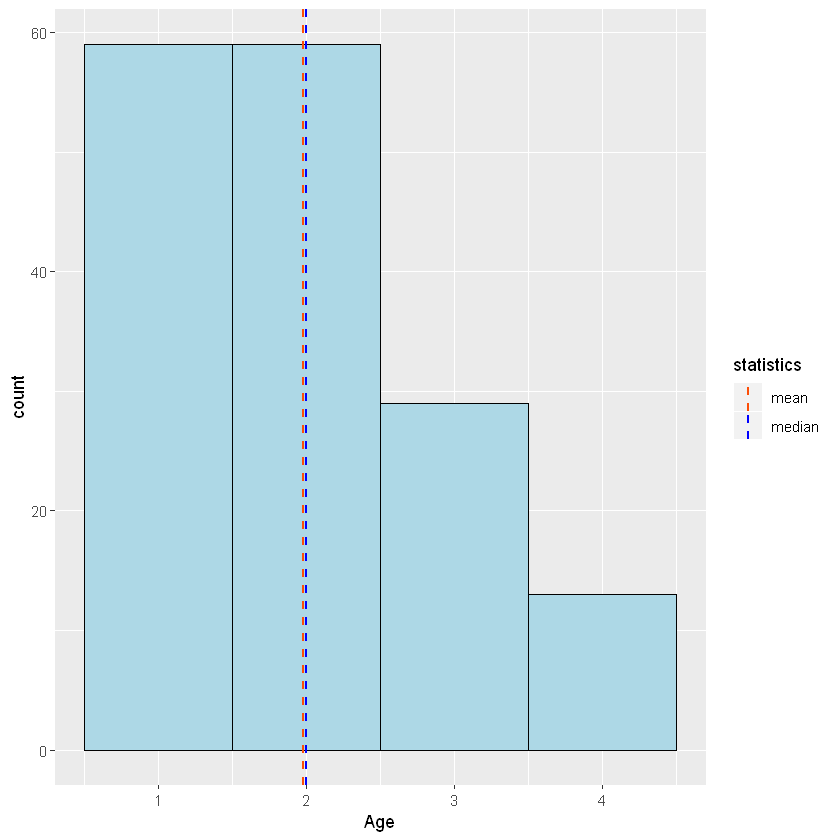

In [7]:
# Pintamos un histograma por cada variable. Dibujaremos la media y la mediana también.
ggplot(hayesroth, aes(x=Age))+
    geom_histogram(bins = length(unique(hayesroth$Age)), fill="lightblue", 
                   color="black")+
    geom_vline(aes(xintercept = mean(Age),color = "mean"), 
             linetype = "dashed", size = 0.6) +
    geom_vline(aes(xintercept = median(Age),color="median"),
                  linetype = "dashed", size = 0.6 ) +
    scale_color_manual(name = "statistics", values = c(mean = "#FC4E07", median = "blue"))

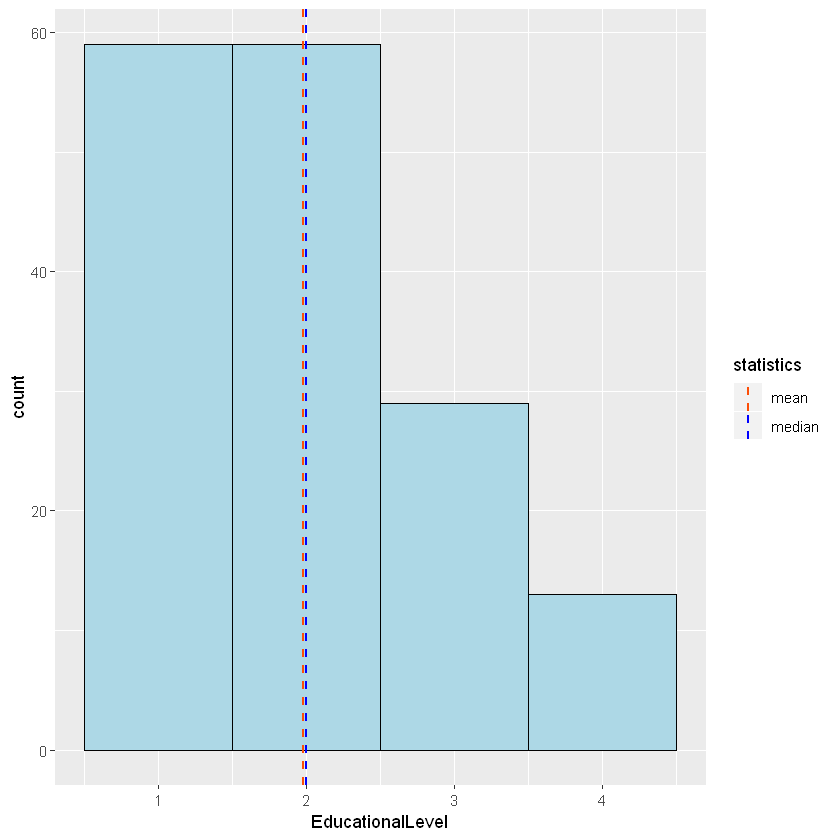

In [8]:
# Pintamos un histograma por cada variable. Dibujaremos la media y la mediana también.
ggplot(hayesroth, aes(x=EducationalLevel))+
    geom_histogram(bins = length(unique(hayesroth$EducationalLevel)), fill="lightblue", 
                   color="black")+
    geom_vline(aes(xintercept = mean(EducationalLevel),color = "mean"), 
             linetype = "dashed", size = 0.6) +
    geom_vline(aes(xintercept = median(EducationalLevel),color="median"),
                  linetype = "dashed", size = 0.6 ) +
    scale_color_manual(name = "statistics", values = c(mean = "#FC4E07", median = "blue"))

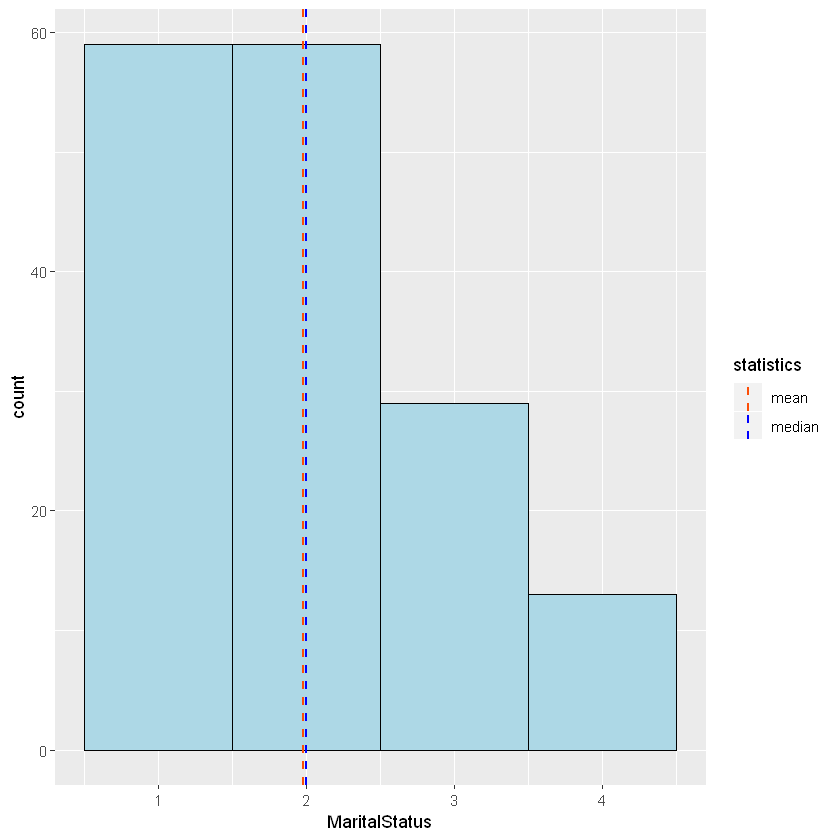

In [9]:
# Pintamos un histograma por cada variable. Dibujaremos la media y la mediana también.
ggplot(hayesroth, aes(x=MaritalStatus))+
    geom_histogram(bins = length(unique(hayesroth$MaritalStatus)), fill="lightblue", 
                   color="black")+
    geom_vline(aes(xintercept = mean(MaritalStatus),color = "mean"), 
             linetype = "dashed", size = 0.6) +
    geom_vline(aes(xintercept = median(MaritalStatus),color="median"),
                  linetype = "dashed", size = 0.6 ) +
    scale_color_manual(name = "statistics", values = c(mean = "#FC4E07", median = "blue"))

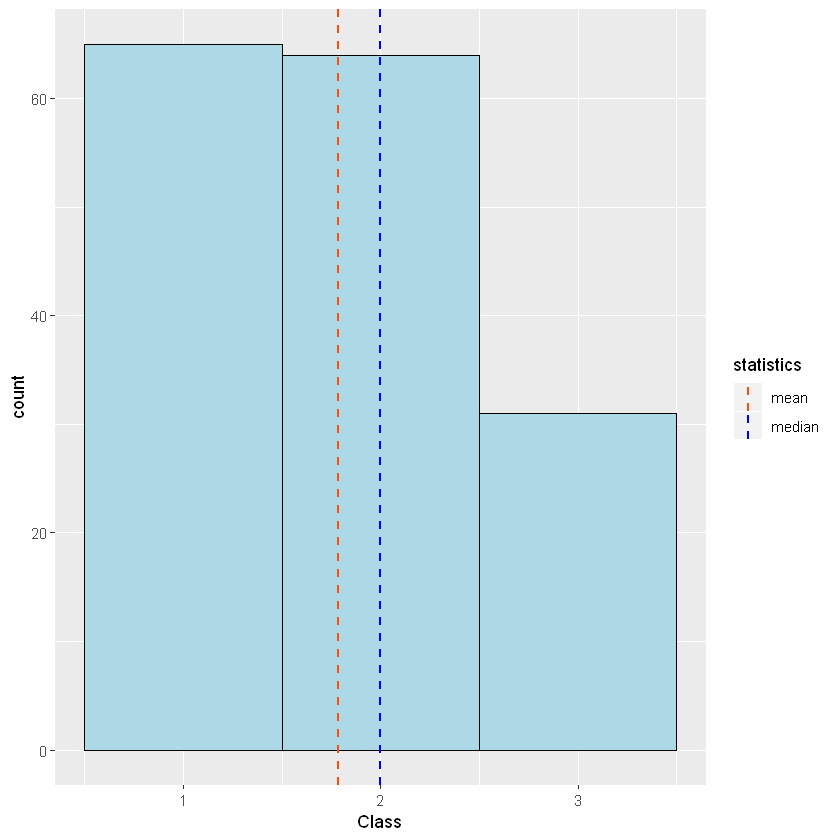

In [10]:
# Pintamos un histograma por cada variable. Dibujaremos la media y la mediana también.
ggplot(hayesroth, aes(x=Class))+
    geom_histogram(bins = length(unique(hayesroth$Class)), fill="lightblue", color="black")+
    geom_vline(aes(xintercept = mean(Class),color = "mean"), 
             linetype = "dashed", size = 0.6) +
    geom_vline(aes(xintercept = median(Class),color="median"),
                  linetype = "dashed", size = 0.6 ) +
    scale_color_manual(name = "statistics", values = c(mean = "#FC4E07", median = "blue"))

Como se puede ver en las gráficas, nos encontramos ante un problema con desvalanceo de clases, ya que la variable *Class* cuenta con un número menor de ejemplos de la clase 3 que para las otras clases. También podemos ver que en las variables *Age*, *EducationalLevel* y *MaritalStatus* existe un número mayor de ejemplos sobre los niveles 1 y 2 que para los niveles 3 y 4; para la variable *Hobby* pasa lo mismo pero del nivel 1 sobre los niveles 2 y 3.

Lo siguiente que haremos será dibujar cada una de las variables predictoras según la clase, de esta forma podremos ver si los datos de las diferentes clases están bien diferenciados unos de los otros.

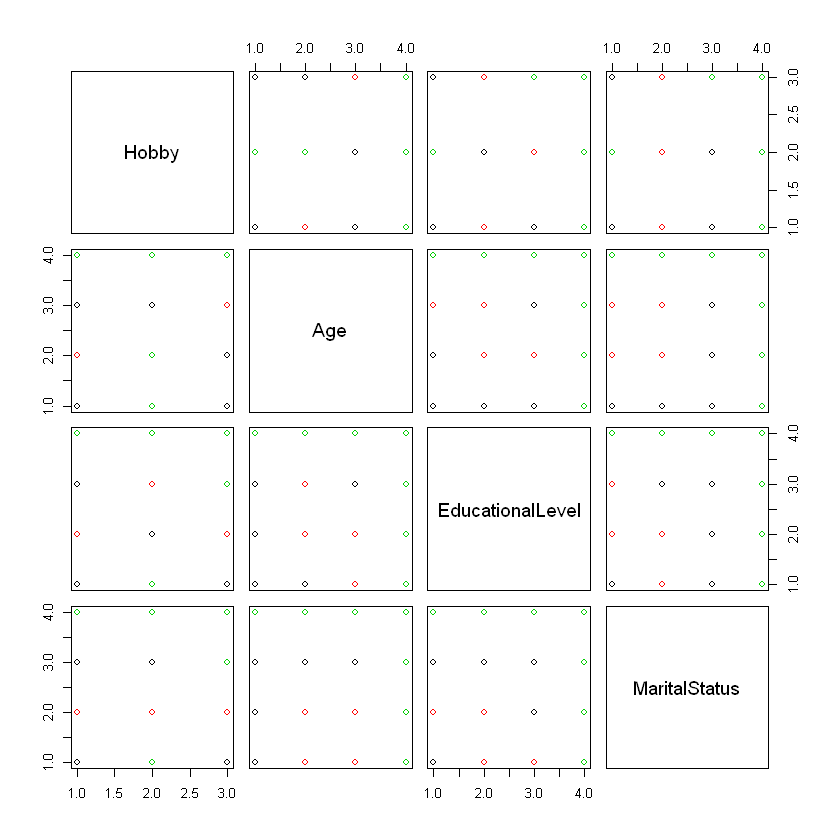

In [11]:
# Dibujamos los datos y pintamos dependiendo de la clase a la que pertenezcan.
plot(hayesroth[,1:4],col=hayesroth[,5])

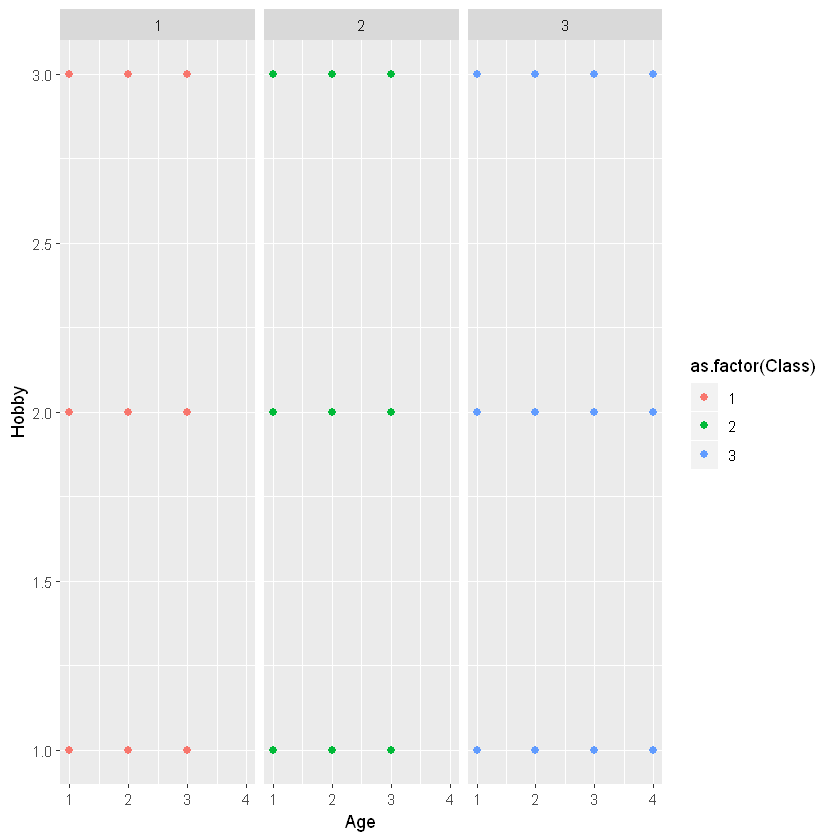

In [12]:
ggplot(hayesroth,aes(y=Hobby,x=Age))+
geom_point(aes(col=as.factor(Class)),size=2)+
facet_grid(~Class)

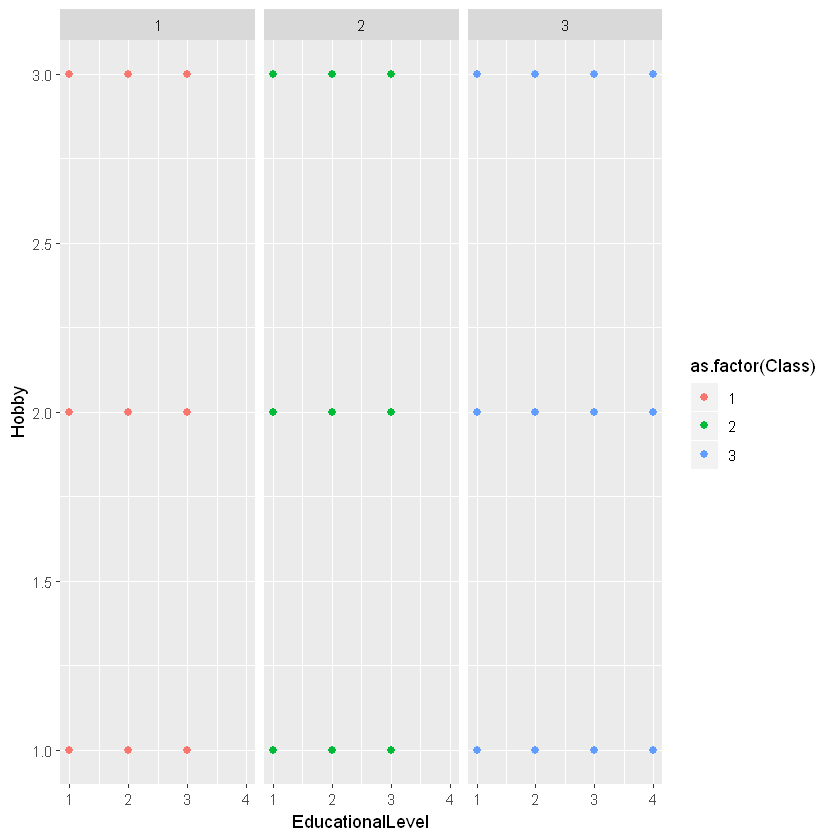

In [13]:
ggplot(hayesroth,aes(y=Hobby,x=EducationalLevel))+
geom_point(aes(col=as.factor(Class)),size=2)+
facet_grid(~Class)

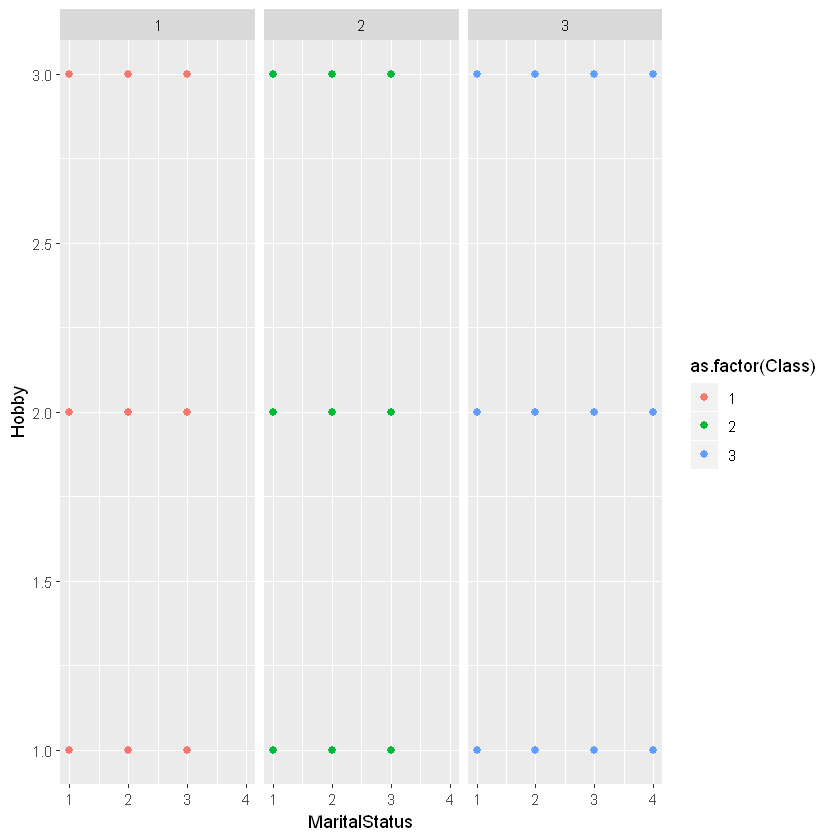

In [14]:
ggplot(hayesroth,aes(y=Hobby,x=MaritalStatus))+
geom_point(aes(col=as.factor(Class)),size=2) +
facet_grid(~Class)

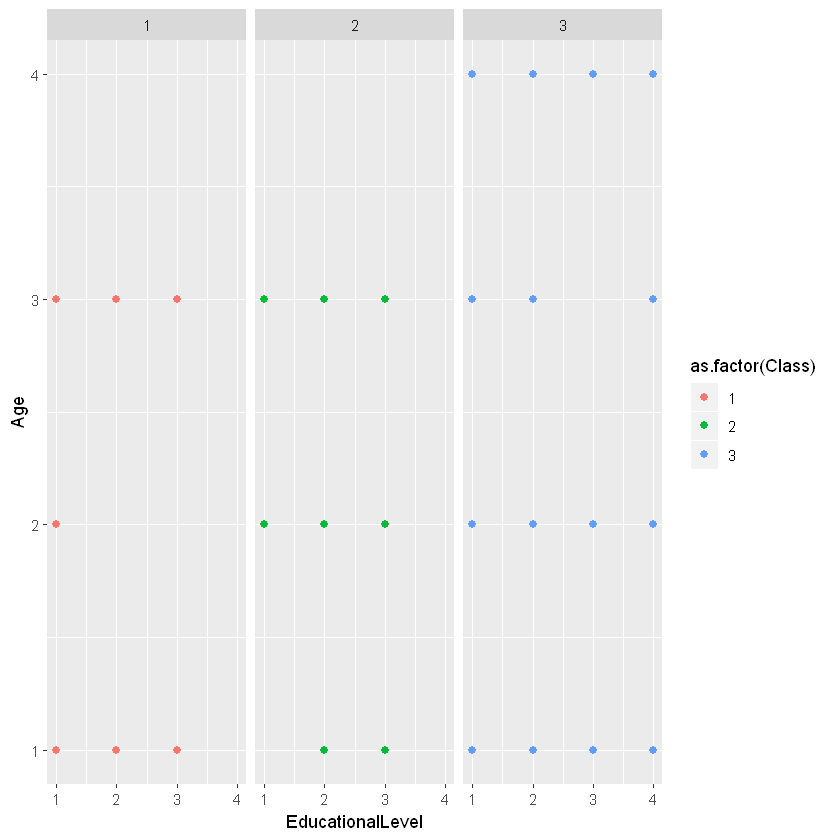

In [15]:
ggplot(hayesroth,aes(y=Age,x=EducationalLevel))+
geom_point(aes(col=as.factor(Class)),size=2) +
facet_grid(~Class)

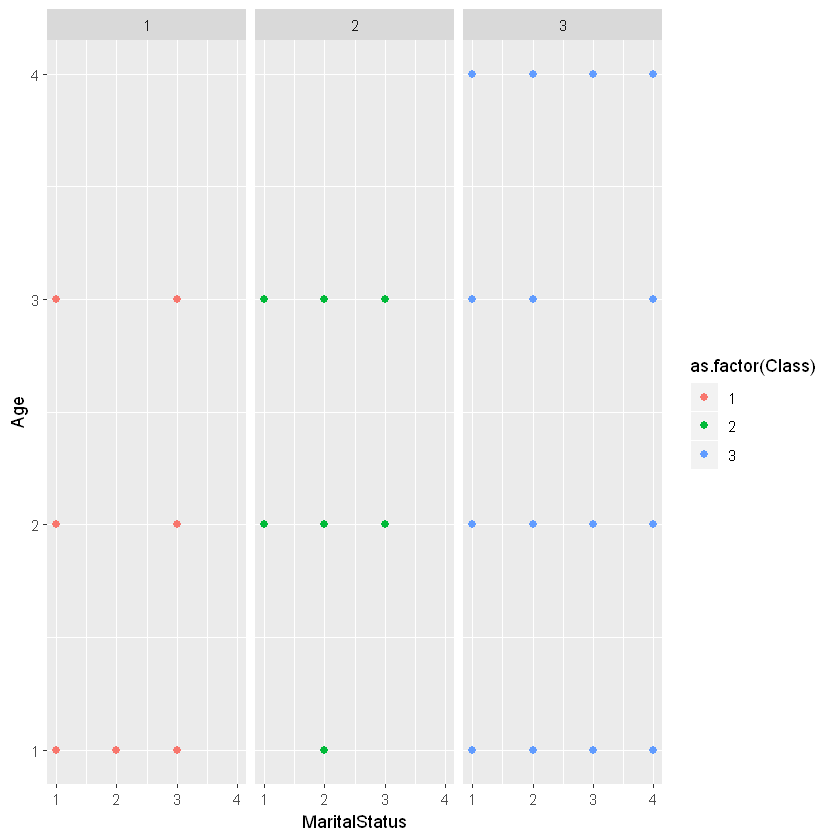

In [16]:
ggplot(hayesroth,aes(y=Age,x=MaritalStatus))+
geom_point(aes(col=as.factor(Class)),size=2)+
facet_grid(~Class)

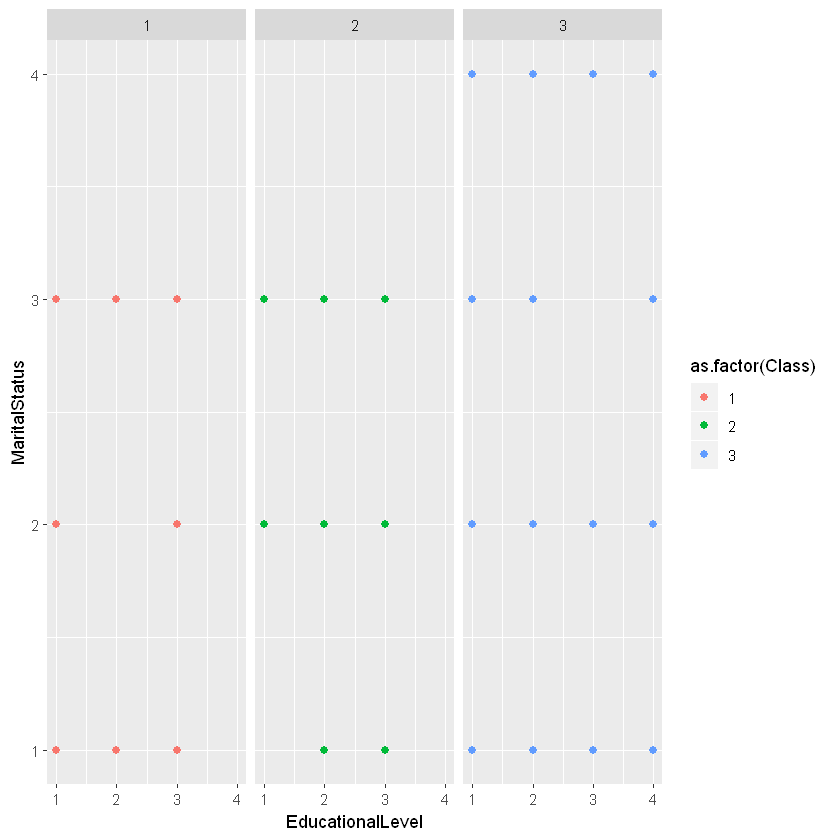

In [17]:
ggplot(hayesroth,aes(y=MaritalStatus,x=EducationalLevel))+
    geom_point(aes(col=as.factor(Class)),size=2)+
    facet_grid(~Class)

In [18]:
library(reshape2)
temp = hayesroth
nhayes <- melt(temp, id.vars = "Class")

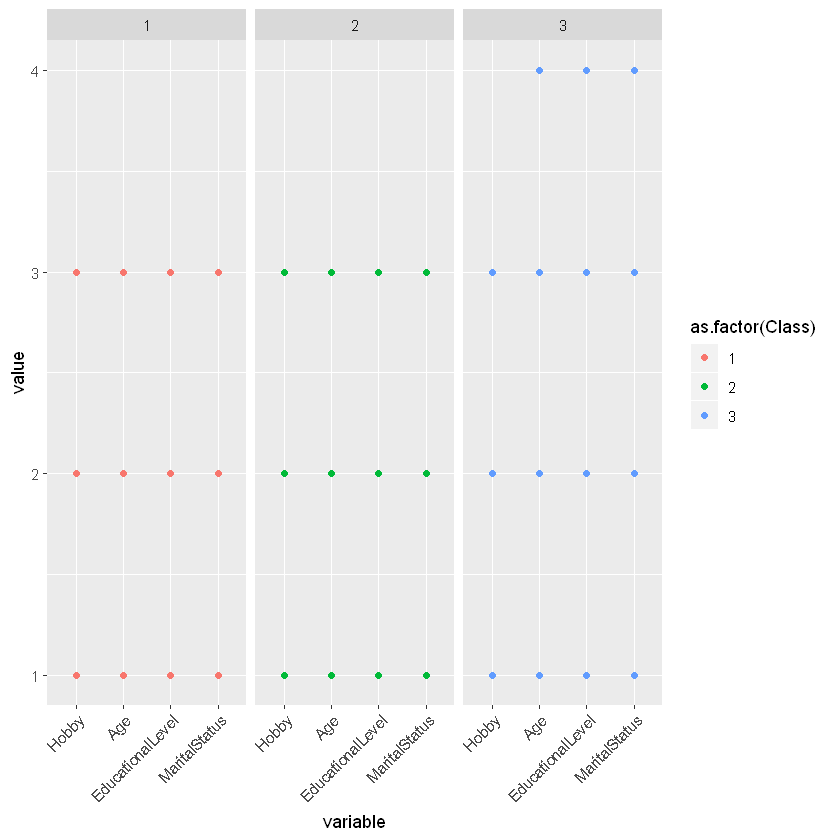

In [19]:
ggplot(nhayes, aes(x=variable, y=value, group=Class)) + 
    geom_point(aes(color=as.factor(Class))) +
                facet_grid(~ Class) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

Como se puede ver en las gráficas anteriores, existen valores de todos los tipos en todas las clases, esto nos dice que la separación entre dichas clases es bastante mala, y por ello será bastante difícil obtener un buen clasificador.La diferencia más clara que se puede ver es que los elementos que toman valores 4 para las variables *Age*, *EducationalLevel* y *MaritalStatus* pertenecen siempre a la tercera clase.

También podemos ver como la variable *Hobby* presenta valores en todas las clases para todos sus valores, por lo que no merece la pena utilizarla en la predicción (como está descrito en el apartado de información, la variable *Hobby* es una variable generada de forma aleatoria para introducir ruido en los datos). Para el resto de los datos, podemos ver que existen algunas diferencias entre los datos de las diferentes clases, por ejemplo, ningún dato con *MaritalStatus* y *EducationalLevel* 1 pertenecen a la segunda clase o los datos de *EducationalLevel* 2 ó 3 y *Age* 2 nunca pertencen a la primera clase. Con las pequeñas diferencias que hay entre las variables *Age*, *EducationalLevel* y *MaritalStatus* nuestro clasificador deberá de conseguir separar las 3 clases que existen.

Probaremos también ha transformar los datos con PCA, para ver si conseguimos una mejor separación de estos.

In [20]:
require(caret)
temp = hayesroth
temp = temp[,-1]
transform = preProcess(temp[1:3],method=c("BoxCox", "center", 
                            "scale", "pca"))
PCA = predict(transform, temp[1:3])
head(PCA)

Loading required package: caret
Loading required package: lattice


PC1,PC2,PC3
1.018395e+00,-0.5879708,-1.2103330
-5.957231e-01,-1.5198825,0.1075892
-2.036791e+00,-1.1759416,-0.3788167
-8.326673e-17,1.1759416,1.2842159
4.226723e-01,-2.1078533,0.9391055
-5.957231e-01,-1.5198825,0.1075892


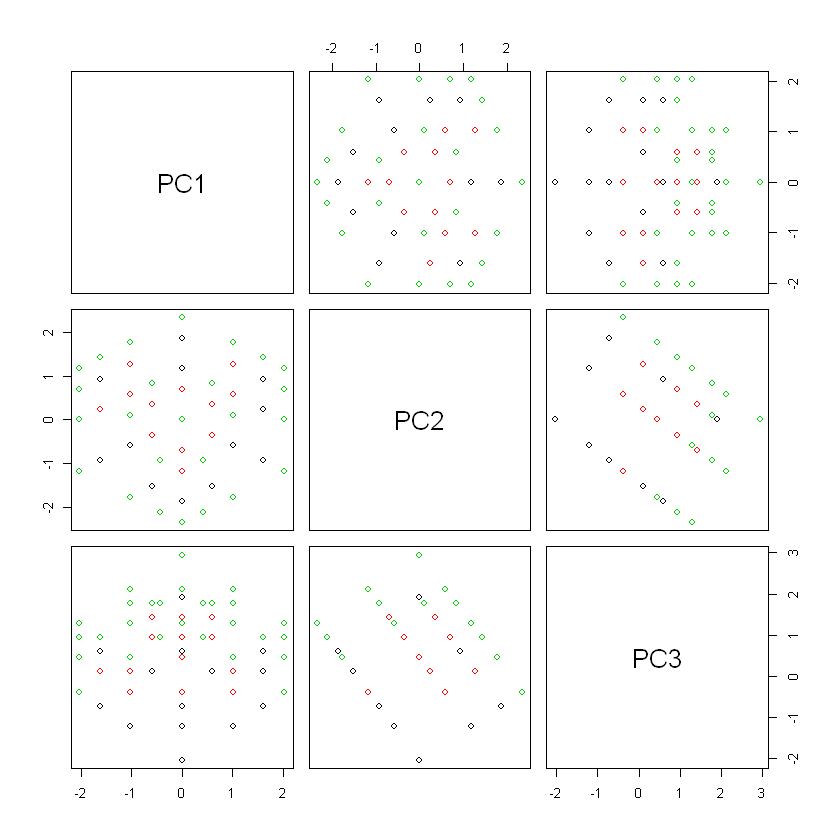

In [21]:
pairs(PCA, col=temp$Class)

Como se puede ver, PCA no consigue separar los datos ni reduce en número de variables del problema, por lo que no utilizaremos esta transformación. Lo siguiente que vamos a hacer es comprobar si existe alguna correlación entre las variables.

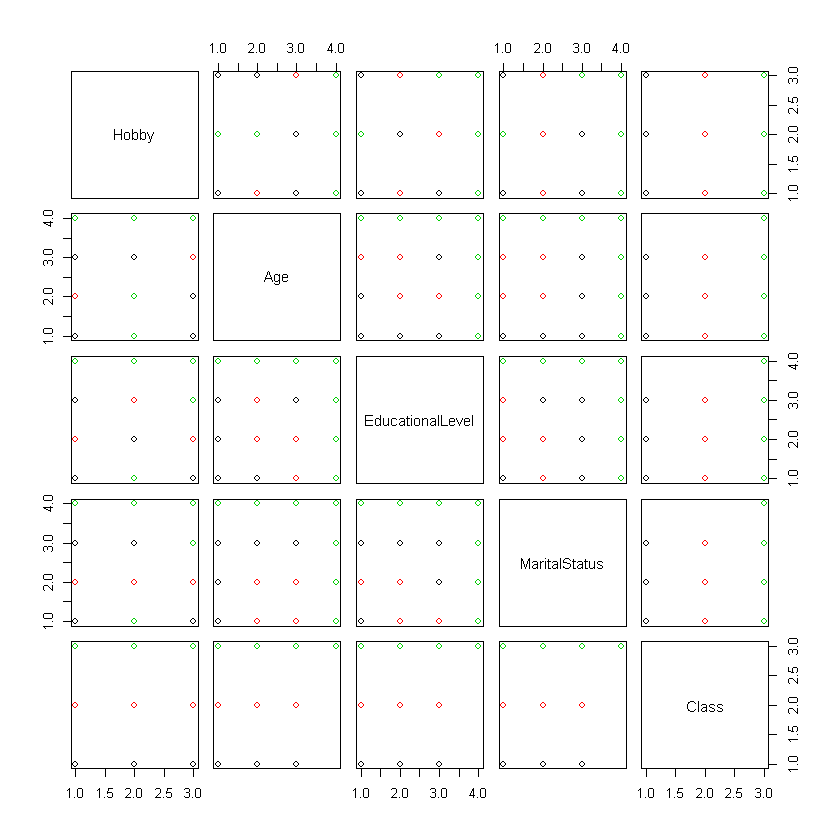

In [22]:
pairs(hayesroth,col=hayesroth[,5])

In [23]:
cor(hayesroth)

,Hobby,Age,EducationalLevel,MaritalStatus,Class
Hobby,1.00000000,0.04251185,-0.05374139,-0.05374139,0.0709883
Age,0.04251185,1.00000000,0.01358113,0.01358113,0.4141117
EducationalLevel,-0.05374139,0.01358113,1.00000000,0.01358113,0.3961654
MaritalStatus,-0.05374139,0.01358113,0.01358113,1.00000000,0.3782190
Class,0.07098830,0.41411171,0.39616537,0.37821903,1.0000000


Como podemos ver, no existen correlaciones entre las variables predictoras ni con la variable predictora, por ello no podemos crear variables nuevas a partir de estas ni eliminar ninguna.

## Creación de modelos de predicción
En este apartado se crearán tres modelos diferentes para predecir la clase a la que pertenecen los datos y se realizará validación cruzada con el mejor modelo encontrado para cada algoritmo que utilizemos. Los algoritmos que se van a probar son *KNN*, *LDA* y *QDA*. Las variables que utilizaremmos con estos algoritmos serán *Age*, *MaritalStatus* y *EducationalLevel*.

### Creación de modelos con el algoritmo KNN
En este apartado utilizaremos el algoritmo KNN para obtener un modelo, también probaremos con diferentes tamaños de k para ver cuales de estos se ajustan mejor al problema. Para ello, utilizaremos la librería *caret* que no permite especificar los diferentes tamaños de k que nos interesen.

In [24]:
# cargamos la librería.
require(caret)

In [25]:
# Para k utilizaremos los valores impares del 3 al 15, para evitar empates dentro de knn.
ks = 3:15
ks = ks[ks%%2 != 0]

# Separamos las variables de entrada y las clases en dos variables distintas para poder utilizarlo con caret.
hr.train = hayesroth[,c("Age","EducationalLevel","MaritalStatus")]
hr.labels.train = hayesroth[,"Class"]
hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))

In [26]:
# Normalizamos los datos ya que estamos trabajando con knn, aunque al tener
# la misma escala en todas las variables de entrada no es necesario.
hr.train = as.data.frame(lapply(hr.train,
                               scale, center = TRUE, scale = TRUE))

In [27]:
# creamos nuestro modelo y obtenemos nuestro mejor k.
knnModel <- train(hr.train,hr.labels.train,
                  method="knn", metric="Accuracy",
                  tuneGrid = data.frame(.k=ks))
knnModel

k-Nearest Neighbors 

160 samples
  3 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 160, 160, 160, 160, 160, 160, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa      
   3  0.7490596   0.60210814
   5  0.7297015   0.56865711
   7  0.6980379   0.51838195
   9  0.6077774   0.37436830
  11  0.5077708   0.21683303
  13  0.4278375   0.08812888
  15  0.3447960  -0.04870711

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

In [28]:
# dibujamos los resultados de cada k.
resultados_k = knnModel$results[,c("k","Accuracy")]

In [29]:
# cargamos la librería ggplot
require(ggplot2)

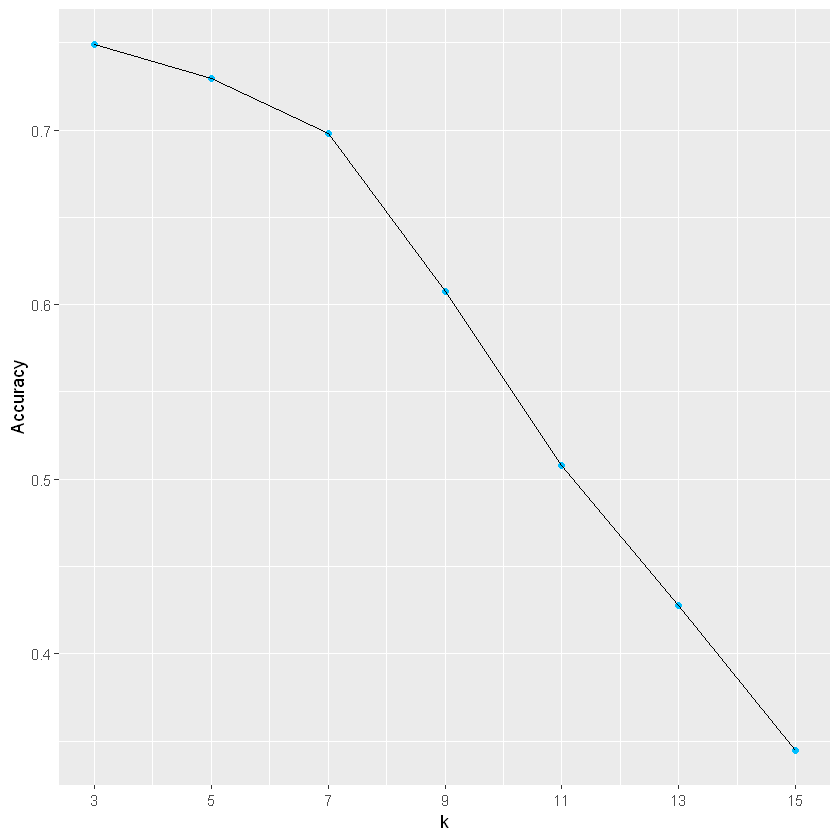

In [30]:
ggplot(resultados_k, aes(x=k, y=Accuracy)) + geom_point(col="deepskyblue") +
    geom_line() + scale_x_continuous(breaks=resultados_k$k)

Como se puede ver en la gráfica, el mejor resultado se obtiene para *k* igual a 3, nos quedaremos con este modelo para hacer validación cruzada (ya que caret crea el modelo final con el k que mejores valores a obtenido).

In [31]:
knnModel <- train(hr.train,hr.labels.train,
                  method="knn", metric="Accuracy",
                  tuneGrid = data.frame(.k=3))
knnModel

knnPred = predict(knnModel,newdata=hr.train) 
acc=postResample(pred = knnPred, obs = hr.labels.train)[1]

k-Nearest Neighbors 

160 samples
  3 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 160, 160, 160, 160, 160, 160, ... 
Resampling results:

  Accuracy   Kappa    
  0.7623892  0.6180869

Tuning parameter 'k' was held constant at a value of 3

In [32]:
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    fitMulti=train(hr.train,hr.labels.train,
                  method="knn", metric="Accuracy",
                  tuneGrid = data.frame(.k=3))
    
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,newdata=test[,c("X2","X3","X4")])
    err = 1-postResample(pred = yprime, obs = labels)[1]
    
}
knnMSEtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
knnMSEtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(knnMSEtrain.all)
print(knnMSEtest.all)

[1] 0.1395833
[1] 0.2375


Como se puede ver por los resultdos obtenidos, el algoritmo de knn tiene sobreaprendizaje.

### Modelos con el algoritmo LDA
En este apartado utilizaremos el algoritmo LDA para crear un modelo que prediga la clase a que pertenece cada dato. Antes de crear los modelos con LDA, comprobaremos si las variables tienen una varianza igual y tienen una ditribución normal; al igual que pare el algoritmo KNN, solamente utilizaremos las variables *Age*, *EducationalLevel* y *MaritalStatus*.

In [33]:
# Separamos las variables de entrada y las clases en dos variables distintas para poder utilizarlo con caret.
hr.train = hayesroth[,c("Age","EducationalLevel","MaritalStatus")]
hr.labels.train = hayesroth[,"Class"]
hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))

# Normalizamos los datos.
hr.train = as.data.frame(lapply(hr.train,
                               scale, center = TRUE, scale = TRUE))

In [34]:
# Cargamos la librería necesaria para comprobar si las distribuciones son normales.
require(MASS) # lda y qda.

Loading required package: MASS


In [35]:
# Comprobamos si tienen una distribución normal y misma varianza.
shapiro.test(hr.train$Age)
shapiro.test(hr.train$EducationalLevel)
shapiro.test(hr.train$MaritalStatus)

var(hr.train$Age)
var(hr.train$EducationalLevel)
var(hr.train$MaritalStatus)


	Shapiro-Wilk normality test

data:  hr.train$Age
W = 0.8329, p-value = 3.074e-12



	Shapiro-Wilk normality test

data:  hr.train$EducationalLevel
W = 0.8329, p-value = 3.074e-12



	Shapiro-Wilk normality test

data:  hr.train$MaritalStatus
W = 0.8329, p-value = 3.074e-12


[1] 1

[1] 1

[1] 1

Como se puede ver según los resultados de los test de Shapiro-Wilk, ninguna de las variables predictoras tiene una distribución normal, esto hará que el algoritmo LDA no funcione correctamente. Las varianzas de las variables es 1 para todas (esto ocurre porque los datos están normalizados).

In [36]:
# Ejecutamos el algoritmo LDA.
temp = hr.train
temp$Class = hr.labels.train
lda.fit = lda(Class~Age+EducationalLevel+MaritalStatus,
             data=temp)
lda.fit

Call:
lda(Class ~ Age + EducationalLevel + MaritalStatus, data = temp)

Prior probabilities of groups:
      1       2       3 
0.40625 0.40000 0.19375 

Group means:
         Age EducationalLevel MaritalStatus
1 -0.3669775      -0.33417501   -0.30137255
2 -0.0233205      -0.05663549   -0.08995048
3  0.8176144       0.81761441    0.81761441

Coefficients of linear discriminants:
                      LD1         LD2
Age              0.833050 -0.69799777
EducationalLevel 0.815173  0.00993965
MaritalStatus    0.797296  0.71787707

Proportion of trace:
   LD1    LD2 
0.9985 0.0015 

Loading required package: klaR
Warning message:
"package 'klaR' was built under R version 3.5.2"

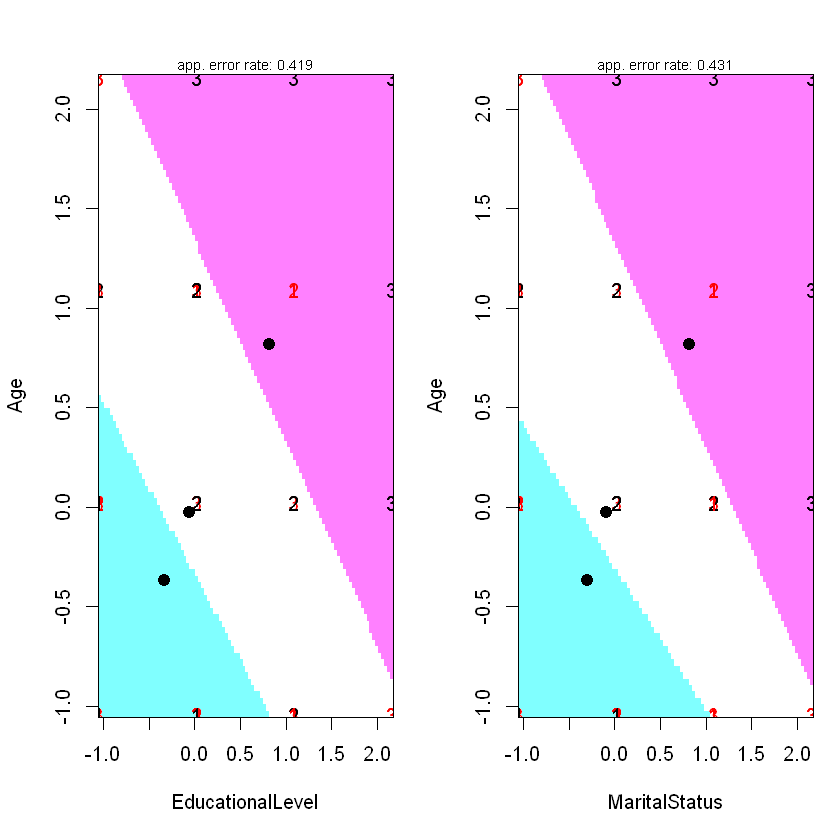

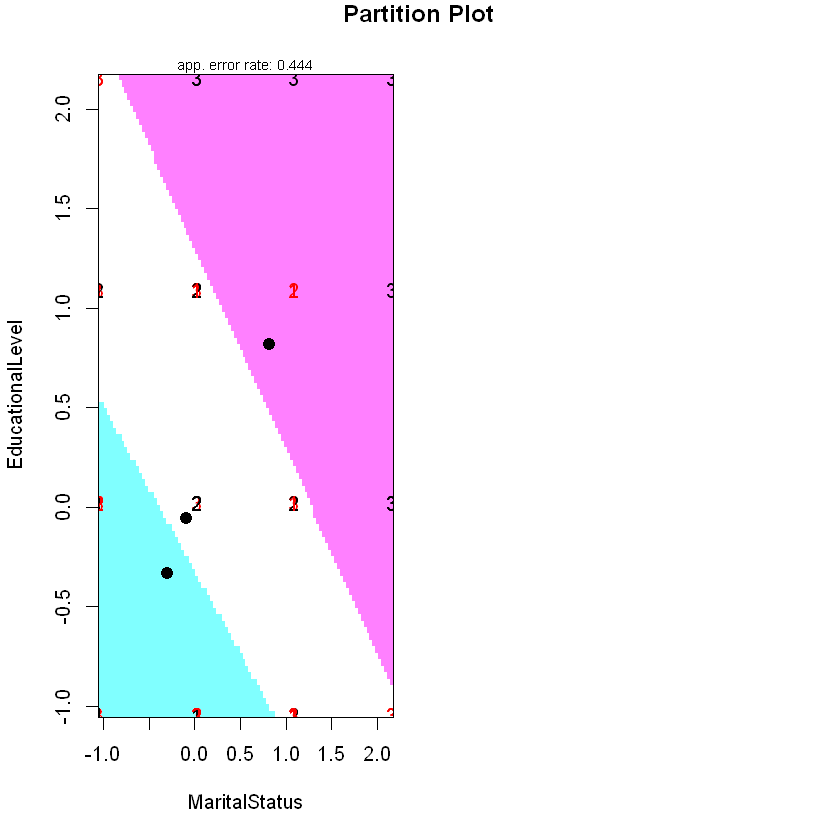

In [37]:
require(klaR)
partimat(Class~Age+EducationalLevel+MaritalStatus,
             data=temp, method="lda")

In [38]:
# Calculamos el error de LDA.
lda.pred = predict(lda.fit, temp[,-4])
mean(lda.pred$class!=temp$Class)

[1] 0.45625

In [39]:
# Validación cruzada para LDA.
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    hr.train$Y = hr.labels.train
    fitMulti=lda(Y~X2+X3+X4, data=hr.train)
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,test[,c("X2","X3","X4")])
    err = mean(yprime$class!=labels)
    
}
ldaERRtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
ldaERRtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(ldaERRtrain.all)
print(ldaERRtest.all)

[1] 0.4583333
[1] 0.4625


Como se puede ver, el algoritmo LDA no tiene sobreaprendizaje, pero sí que obtiene peores resultados que el algoritmo KNN.

### Modelos con algoritmo QDA
En este apartado utilizaremos el algoritmo QDA para predecir las clases, para ello utilizaremos comprobaremos sí los datos cumplen las características necesarias para que QDA funcione correctamente. Tras esto, crearemos un modelo con las variables *Age*, *MaritalStatus* y *EducationalLevel*  y realizaremos validación cruzada.

In [40]:
# Comprobamos que las varianzas de los predictores para las diferentes clases
# son diferentes.
cat("Varianzas para Age:\n")
var(temp[temp$Class==1,]$Age)
var(temp[temp$Class==2,]$Age)
var(temp[temp$Class==3,]$Age)
cat("Varianzas para EducationalLevel:\n")
var(temp[temp$Class==1,]$EducationalLevel)
var(temp[temp$Class==2,]$EducationalLevel)
var(temp[temp$Class==3,]$EducationalLevel)
cat("Varianzas para MaritalStatus:\n")
var(temp[temp$Class==1,]$MaritalStatus)
var(temp[temp$Class==2,]$MaritalStatus)
var(temp[temp$Class==3,]$MaritalStatus)

Varianzas para Age:


[1] 0.6950294

[1] 0.5206259

[1] 1.740229

Varianzas para EducationalLevel:


[1] 0.7201641

[1] 0.5161159

[1] 1.740229

Varianzas para MaritalStatus:


[1] 0.7431132

[1] 0.5093509

[1] 1.740229

Como todas las varianzas son diferentes, en principio QDA debería de funcionar mejor que LDA. Lo siguiente que haremos será crear un modelo y ver los resultados que obtiene.

In [41]:
# creamos el modelo con QDA.
qda.fit = qda(Class~Age+EducationalLevel+MaritalStatus,
             data=temp)
qda.fit

Call:
qda(Class ~ Age + EducationalLevel + MaritalStatus, data = temp)

Prior probabilities of groups:
      1       2       3 
0.40625 0.40000 0.19375 

Group means:
         Age EducationalLevel MaritalStatus
1 -0.3669775      -0.33417501   -0.30137255
2 -0.0233205      -0.05663549   -0.08995048
3  0.8176144       0.81761441    0.81761441

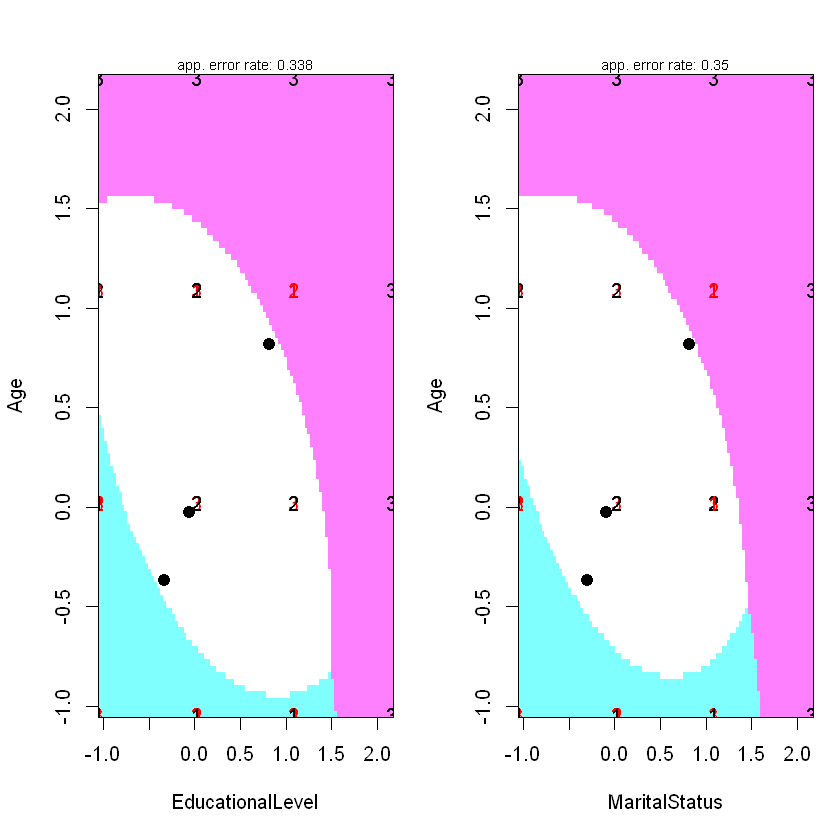

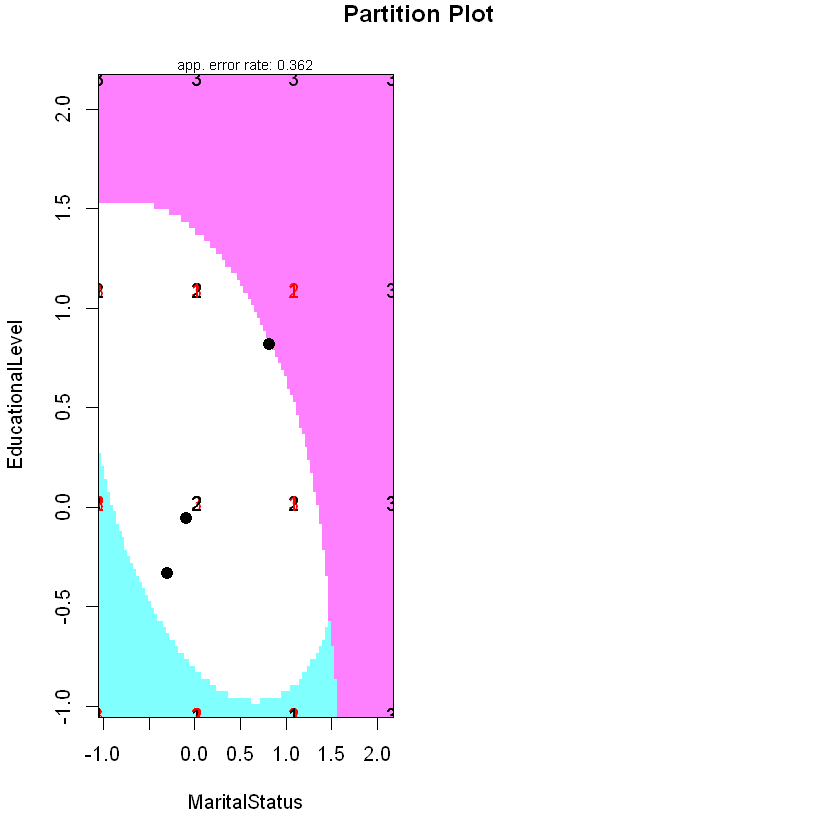

In [42]:
# dibujamos los resultados obtenidos por QDA.
partimat(Class~Age+EducationalLevel+MaritalStatus,
             data=temp, method="qda")

In [43]:
# Calculamos el error para qda.
qda.pred = predict(qda.fit, temp[,-4])
mean(qda.pred$class!=temp$Class)

[1] 0.275

In [44]:
# Realizamos validación cruzada para QDA
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    hr.train$Y = hr.labels.train
    fitMulti=qda(Y~X2+X3+X4, data=hr.train)
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,test[,c("X2","X3","X4")])
    err = mean(yprime$class!=labels)
    
}
qdaERRtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
qdaERRtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(qdaERRtrain.all)
print(qdaERRtest.all)

[1] 0.2590278
[1] 0.35


Como se puede ver, QDA obtiene mejores resultados que LDA, pero tiene sobreaprendizaje. Por ahora, el mejor modelo que hemos obtenido es el generado por KNN, ya que obtiene un entre 22-26 por ciento de error, lo cual mejora en un 10% a QDA y un 20% a LDA.

### Modelos con árboles de decisión
Este apartado es adicional y se ha hecho ya que parece que el dataset puede predecirse mejor con un árbol de decisión, ya que existen muy pocas diferencias entre los datos de cada clase y cada variable (pueden verse los scatterplots divididos por clase en el apartado de análisis exploratorio).

In [45]:
# cargamos la librería que contiene los árboles de decisión.
require(tree)

temp=hayesroth
temp$Class = factor(temp$Class,levels=c(1,2,3))

set.seed (2)
train=sample (1:nrow(temp), round(nrow(temp)*0.8) )
hayes.test=temp[-train ,]

# Construyo el arbol sobre el conjunto de entrenamiento
tree.hayes =tree(Class~Age+EducationalLevel+MaritalStatus ,
                temp ,subset =train )

summary(tree.hayes)

# Aplico el arbol sobre el conjunto de test
tree.pred =predict (tree.hayes,hayes.test,type ="class")

# Visualizo la matriz de confusion
table(tree.pred , hayes.test[,"Class"])
mean(tree.pred!=hayes.test$Class)

Loading required package: tree



Classification tree:
tree(formula = Class ~ Age + EducationalLevel + MaritalStatus, 
    data = temp, subset = train)
Number of terminal nodes:  12 
Residual mean deviance:  0.6289 = 72.95 / 116 
Misclassification error rate: 0.1484 = 19 / 128 

         
tree.pred  1  2  3
        1 12  0  2
        2  4  9  2
        3  0  0  3

[1] 0.25

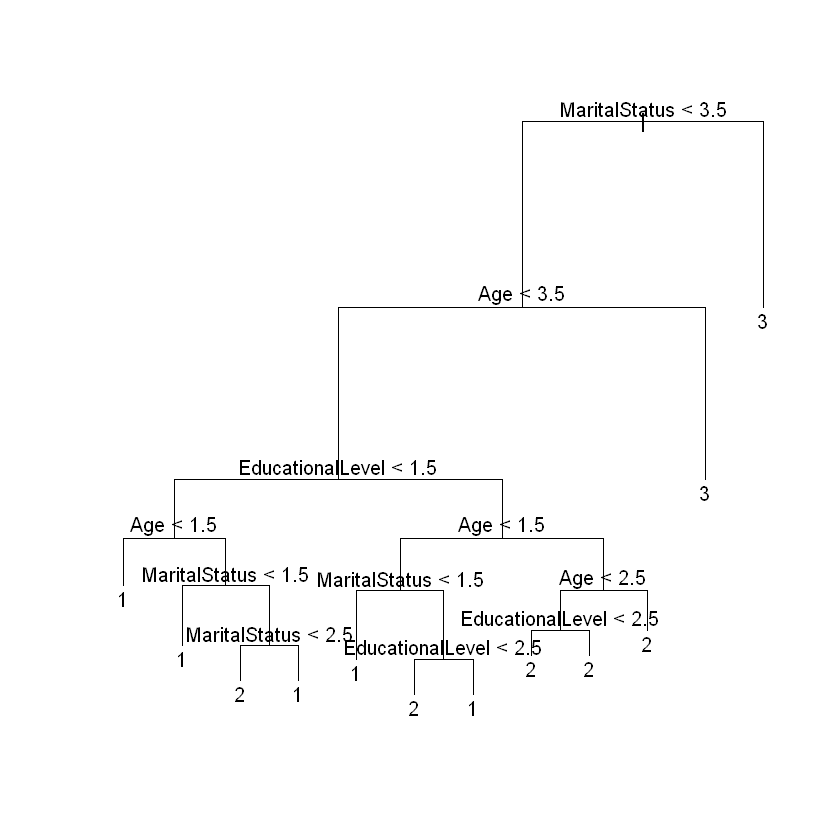

In [46]:
# Dibujamos el árbol.
plot(tree.hayes)
text(tree.hayes, pretty=0)

In [47]:
# Validación cruzada para el árbol de decisión.
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    hr.train$Y = hr.labels.train
    fitMulti=tree(Y~X2+X3+X4, data=hr.train)
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,test, type="class")
    err = mean(yprime!=labels)
    
}
treeERRtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
treeERRtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(treeERRtrain.all)
print(treeERRtest.all)

[1] 0.1125
[1] 0.175


Como se puede ver, el modelo con árboles de decisión cuenta también con cierto sobreaprendizaje, pero es el que mejores resultados obtiene de todos. Aún así no lo utilizaremos para compararlo con el resto de algoritmos ya que no se pide en la práctica.

## Comparación de los algoritmos
En este apartado se compararán los algoritmos que se han creado en la práctica. Para ello, utilizaremos los datos que vienen en el archivo *clasif_test_alumnos.csv* y sustituiremos los valores obtenidos en la tabla, tras esto, utilizaremos el test de Friedman y el test de Holm para encontrar diferencias.

### Comparación de los algoritmos de test
En este apartado se compararán los algoritmos de test y se comentarán los resultados. Además, se calculará el acierto de los modelos utilizando todas las variables, ya que los modelos anteriores no utilizan la variable *Hobby* para evitar ruido.

In [48]:
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X1","X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    fitMulti=train(hr.train,hr.labels.train,
                  method="knn", metric="Accuracy",
                  tuneGrid = data.frame(.k=3))
    
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,newdata=test[,c("X1","X2","X3","X4")])
    err = postResample(pred = yprime, obs = labels)[1]
    
}
knnACCtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
knnACCtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(knnACCtrain.all)
print(knnACCtest.all)

[1] 0.8270833
[1] 0.625


In [49]:
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X1","X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    hr.train$Y = hr.labels.train
    fitMulti=lda(Y~X2+X3+X4, data=hr.train)
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,test[,c("X1","X2","X3","X4")])
    err = mean(yprime$class==labels)
    
}
ldaACCtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
ldaACCtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(ldaACCtrain.all)
print(ldaACCtest.all)

[1] 0.5416667
[1] 0.5375


In [50]:
nombre <- "hayes-roth/hayes-roth"

run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-10-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-10-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    
    hr.train = x_tra[,c("X1","X2","X3","X4")]
    hr.labels.train = x_tra[,"Y"]
    hr.labels.train = factor(hr.labels.train, levels=c(1,2,3))
    hr.train$Y = hr.labels.train
    fitMulti=qda(Y~X2+X3+X4, data=hr.train)
    labels = factor(test[,"Y"],levels=c(1,2,3))
    yprime=predict(fitMulti,test[,c("X1","X2","X3","X4")])
    err = mean(yprime$class==labels)
    
}
qdaACCtrain.all<-mean(sapply(1:10,run_knn_fold,nombre,"train"))
qdaACCtest.all<-mean(sapply(1:10,run_knn_fold,nombre,"test"))
print(qdaACCtrain.all)
print(qdaACCtest.all)

[1] 0.7409722
[1] 0.65


In [51]:
# Leemos los datos de la tabla
resultados.test = read.csv("clasif_test_alumos.csv", header=TRUE)
row.names(resultados.test) = resultados.test$X
resultados.test$X = NULL

# substituimos los datos obtenidos por nuestro dataset.
resultados.test["hayes-roth",]$out_test_knn = knnACCtest.all
resultados.test["hayes-roth",]$out_test_lda = ldaACCtest.all
resultados.test["hayes-roth",]$out_test_qda = qdaACCtest.all
resultados.test

,out_test_knn,out_test_lda,out_test_qda
appendicitis,0.8966667,0.8690909,0.8109091
australian,0.6838235,0.8579710,0.8028986
balance,0.9024546,0.8624101,0.9167905
bupa,0.6865775,0.6837924,0.5991759
contraceptive,0.5448653,0.5091561,0.5173102
haberman,0.7462069,0.7481720,0.7512903
hayes-roth,0.6250000,0.5375000,0.6500000
heart,0.6692308,0.8481481,0.8296296
iris,0.9642857,0.9800000,0.9733333
led7digit,0.7510204,0.7420000,0.6975000


In [52]:
# Realizamos el test de Friedman.
friedman.test = friedman.test(as.matrix(resultados.test))
friedman.test


	Friedman rank sum test

data:  as.matrix(resultados.test)
Friedman chi-squared = 0.7, df = 2, p-value = 0.7047


Dado que tenemos un p-valor muy alto, según el test de Friedman no existen diferencias significativas entre los algoritmos. Ahora realizaremos el test de Holm para ver si hay diferencias significativas 2 a 2.

In [53]:
tam = dim(resultados.test)
groups = as.numeric(rep(1:tam[2],each=tam[1]))
pairwise.wilcox.test(as.matrix(resultados.test),groups,p.adjust="holm",paired=TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  as.matrix(resultados.test) and groups 

  1    2   
2 1.00 -   
3 0.49 1.00

P value adjustment method: holm 

Como se puede ver, el tercer algoritmo sí que presenta diferencias con respecto al resto ( su valor es 0.53, el del resto es 1). Por lo tanto, podemos concluir que el algoritmo QDA obtiene mejores resultados que el resto de algoritmos estudiados. Ahora repetiremos el proceso con los valores para train.

### Comparación con los datos de train

In [54]:
# Leemos la tabla y sustituimos los datos.
resultados.train = read.csv("clasif_train_alumnos.csv",header=TRUE)
row.names(resultados.train) = resultados.train$X
resultados.train$X = NULL

resultados.train["hayes-roth",]$out_train_knn = knnACCtrain.all
resultados.train["hayes-roth",]$out_train_lda = ldaACCtrain.all
resultados.train["hayes-roth",]$out_train_qda = qdaACCtrain.all

resultados.train

,out_train_knn,out_train_lda,out_train_qda
appendicitis,0.8834602,0.8815461,0.8690241
australian,0.7277419,0.8605475,0.8072464
balance,0.9072122,0.8791122,0.9167999
bupa,0.7405521,0.7024224,0.6447628
contraceptive,0.6168944,0.5236485,0.5314180
haberman,0.7795116,0.7519934,0.7567115
hayes-roth,0.8270833,0.5416667,0.7409722
heart,0.7342975,0.8576132,0.8777778
iris,0.9791045,0.9800000,0.9814815
led7digit,0.7636971,0.7635556,0.7680556


In [55]:
# Realizamos el test de friedman.
test.friedman = friedman.test(as.matrix(resultados.train))
test.friedman


	Friedman rank sum test

data:  as.matrix(resultados.train)
Friedman chi-squared = 0.9, df = 2, p-value = 0.6376


In [56]:
# Relizamos el test de post-hoc. (Holm)
tam = dim(resultados.train)
groups = as.numeric(rep(1:tam[2],each=tam[1]))
pairwise.wilcox.test(as.matrix(resultados.train),groups,p.adjust="holm",paired=TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  as.matrix(resultados.train) and groups 

  1    2   
2 1.00 -   
3 1.00 0.53

P value adjustment method: holm 

Según los resultados obtenidos por el test de Friedman, no existen diferencias significativas entre los algoritmos. Según los resultados obtenidos en el test de Holm, el segundo algoritmo (LDA) se diferencia del resto de los algoritmos, esto puede haber ocurrido por un buen ajuste de alguno de los datasets, que haya hecho que se diferencie del resto.